# Zbiory danych treningowych

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display
from collections import Counter
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import seaborn as sns


CURR_FILE_NAME = "test.csv" # or test.csv

colors = ["#0101DF", "#DF0101"]

In [155]:

def load_data(path):
  if path is None or path == "":
    raise ValueError("Dataset path is invalid")
  elif not os.path.exists(path):
    raise FileNotFoundError(f"Dataset not found at path: {path}")

  train_path = os.path.join(path, CURR_FILE_NAME)

  return pd.read_csv(train_path)

In [156]:
def analyze_data(df, class_column_key):
  #display shape
  display(df.shape)
  #display sum of cells having null value and column name
  null_counts = df.isnull().sum()
  max_nulls = null_counts.max()
  max_null_col = null_counts[null_counts == max_nulls].index[0] if max_nulls > 0 else "No nulls"
  display(f"Maximum null values: {max_nulls} in column: {max_null_col}")
  # Get null values and dataframe information
  print('Null Values In DataFrame: {}\n'.format(df.isna().sum().sum()))
  display(df.info())

  label_col = df[class_column_key]

  # Plotting data
  label_counts = label_col.value_counts()

  # Get colors
  n = label_counts.shape[0]
  colormap = get_cmap('viridis')
  colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

  plt.figure(figsize=(10, 6)) # Create a new figure and set its size
  plt.bar(label_counts.index, label_counts.values, color=colors) # Create a bar plot
  plt.title('Class counts') # Set the title of the plot
  plt.xlabel('Class names') # Set the label for the x-axis
  plt.ylabel('Count') # Set the label for the y-axis
  plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
  plt.show() # Display the plot

  display(df.describe(include='all'))

In [157]:
def plot_distributions(df, class_names):
  for class_name in class_names:
    df_frist_class = df[class_name]
    fig1, ax1 = plt.subplots(figsize=(9, 5))
    sns.distplot(df_frist_class.values, ax=ax1, color='r')
    ax1.set_title('Distribution of ' + class_name, fontsize=14)
    ax1.set_xlim([df_frist_class.min(), df_frist_class.max()])
    plt.show()

# Human Activity Recognition

In [158]:
df = load_data("data/raw/multi_class_balanced_human_activity_recognition")
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

(2947, 563)

'Maximum null values: 0 in column: No nulls'

Null Values In DataFrame: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


None

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_57064/2670232780.py:20: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



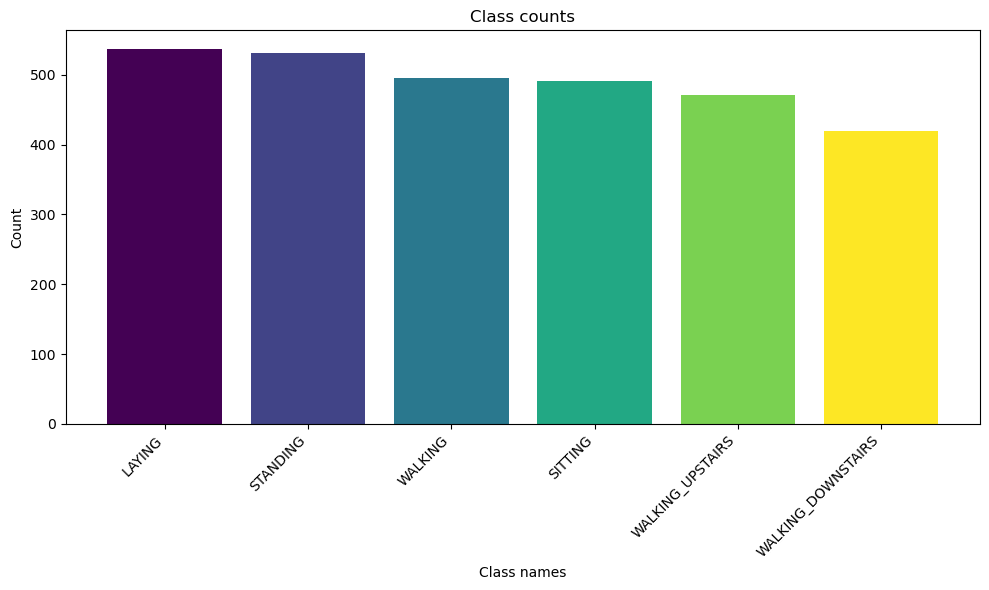

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAYING
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427,NaN
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984,NaN
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000,NaN
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000,NaN
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000,NaN
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000,NaN


In [159]:
analyze_data(df, "Activity")

In [160]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


# Save processed dataset to CSV

In [161]:

# Save train or test datasets
df.to_csv('data/processed/multi_class_balanced_human_activity_recognition/' + CURR_FILE_NAME, index=False)

print("Training set shape:", df.shape)
print("Dataset saved to: ", 'data/processed/multi_class_balanced_human_activity_recognition/' + CURR_FILE_NAME)

Training set shape: (2947, 563)
Dataset saved to:  data/processed/multi_class_balanced_human_activity_recognition/test.csv
